<a href="https://colab.research.google.com/github/Samave02/HoneyTic-/blob/main/Beehives/beehives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context**


Este conjunto de datos forma parte de mi tesis de maestría "Sistema de monitoreo de colmenas inteligente basado en aprendizaje automático sin red de Internet".
Datos recopilados de las colmenas número 17, 36 y 85 en un colmenar ubicado en **Çanakkale, Turquía.**

Los datos se utilizaron con algoritmos de detección de anomalías no supervisados ​​para determinar los **valores críticos** de **temperatura** y **humedad relativa** para calibrar el sistema de alarma.

Los resultados mostraron que **las anomalías fatales se pueden detectar semanas antes de la pérdida de la colonia.**

**Contenido**

+1000 filas y 10 columnas.
La descripción de las columnas se enumera a continuación.

* *DateTime* : Fecha y hora en formato "dd.mm.aaaa hh:mm"
* *T17* : Temperatura de la colmena 17
* *RH17* : Humedad relativa de la colmena 17
* *AT17* : Temperatura aparente de la colmena 17
* *Tamb* : Temperatura ambiente
* *RHamb* : Humedad relativa ambiente
* *ATamb* : Temperatura ambiente aparente
* *T17-Tamb* : T17 - Tamb
* *AT17-ATamb* : AT17 - ATamb

In [1]:
import pandas as pd

df_hive17 = pd.read_csv('https://raw.githubusercontent.com/Samave02/HoneyTic-/main/Beehives/Hive17.csv', sep=';')
df_hive36 = pd.read_csv('https://raw.githubusercontent.com/Samave02/HoneyTic-/main/Beehives/Hive36.csv', sep=';')
df_hive85 = pd.read_csv('https://raw.githubusercontent.com/Samave02/HoneyTic-/main/Beehives/Hive85.csv', sep=';')

In [2]:
df_hive17['Hive'] = 17
df_hive17 = df_hive17.rename(columns={'T17': 'T',
                          'RH17': 'RH',
                          'AT17': 'AT',
                          'T17-Tamb':'T-Tamb',
                          'AT17-ATamb':'AT-ATamb'})
df_hive17.head()

,Hour,DateTime,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1,21.08.2021 14:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5,17
1,2,21.08.2021 15:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6,17
2,3,21.08.2021 16:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9,17
3,4,21.08.2021 17:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3,17
4,5,21.08.2021 18:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4,17


In [3]:
df_hive17.shape

(1847, 11)

In [4]:
df_hive36['Hive'] = 36
df_hive36 = df_hive36.rename(columns={'T36': 'T',
                          'RH36': 'RH',
                          'AT36': 'AT',
                          'T36-Tamb':'T-Tamb',
                          'AT36-ATamb':'AT-ATamb'})
df_hive36.head()

,Hour,DateTime,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1847,6.11.2021 12:00,29.2,66,34.3,23.6,49,24.3,5.6,10.0,36
1,1848,6.11.2021 13:00,27.3,71,31.9,25.1,43,25.5,2.2,6.4,36
2,1849,6.11.2021 14:00,28.3,69,33.2,25.7,40,26.0,2.6,7.3,36
3,1850,6.11.2021 15:00,29.3,67,34.5,24.6,49,25.6,4.7,8.9,36
4,1851,6.11.2021 16:00,30.1,66,35.5,23.4,51,24.2,6.7,11.3,36


In [5]:
df_hive36.shape

(4227, 11)

In [6]:
df_hive85['Hive'] = 85
df_hive85 = df_hive85.rename(columns={'T85': 'T',
                          'RH85': 'RH',
                          'AT85': 'AT',
                          'T85-Tamb':'T-Tamb',
                          'AT85-ATamb':'AT-ATamb'})
df_hive85.head()

,Hour,DateTime,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1,21.08.2021 14:00,36.3,78,48.4,28.8,33,29.1,7.5,19.3,85
1,2,21.08.2021 15:00,34.9,83,46.7,28.8,36,29.5,6.1,17.1,85
2,3,21.08.2021 16:00,34.1,87,45.9,28.9,35,29.5,5.2,16.4,85
3,4,21.08.2021 17:00,34.2,89,46.5,28.5,36,29.1,5.7,17.4,85
4,5,21.08.2021 18:00,33.9,90,46.2,27.5,40,28.4,6.4,17.8,85


In [7]:
df_hive = pd.merge(df_hive17, df_hive36, how='outer').merge(df_hive85, how='outer')

df_hive[['Fecha', 'Hora']] = df_hive['DateTime'].str.split(' ', expand=True)

df_hive.drop('DateTime', axis=1, inplace=True)

first_column = df_hive.columns[0]

cols = [first_column, 'Fecha', 'Hora'] + [col for col in df_hive.columns if col not in [first_column, 'Fecha', 'Hora']]
df_hive = df_hive[cols]

df_hive.head()

,Hour,Fecha,Hora,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1,21.08.2021,14:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5,17
1,2,21.08.2021,15:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6,17
2,3,21.08.2021,16:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9,17
3,4,21.08.2021,17:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3,17
4,5,21.08.2021,18:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4,17


In [29]:
df_hive.describe().T

,count,mean,std,min,25%,50%,75%,max
Hora,12147.0,3036.902033,1753.157318,1.0,1519.0,3037.0,4555.0,6073.0
Temp,12147.0,24.677254,6.508040,7.5,19.6,24.3,30.3,37.6
humRel,12147.0,63.223924,11.505599,29.0,56.0,63.0,70.0,100.0
tempApte,12147.0,27.652186,9.319050,5.9,20.5,26.3,34.7,52.3
tempAmbte,12147.0,11.368420,7.391149,-6.3,6.0,11.1,16.0,34.4
humRelAmbte,12147.0,71.395159,18.203384,17.0,58.0,74.0,87.0,100.0
tempApteAmbte,12147.0,10.579970,8.531757,-9.6,4.1,10.5,16.3,36.1
difTemp,12147.0,13.308833,5.993539,-4.1,9.1,13.2,17.2,32.6
difTempApte,12147.0,17.072413,7.260612,-5.8,11.9,16.6,21.5,39.6
Hive,12147.0,57.608957,28.078649,17.0,36.0,36.0,85.0,85.0


In [8]:
df_hive['Hive'].value_counts()

,count
Hive,
85,6073
36,4227
17,1847


In [9]:
df_hive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12147 entries, 0 to 12146
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hour      12147 non-null  int64  
 1   Fecha     12147 non-null  object 
 2   Hora      12147 non-null  object 
 3   T         12147 non-null  float64
 4   RH        12147 non-null  int64  
 5   AT        12147 non-null  float64
 6   Tamb      12147 non-null  float64
 7   RHamb     12147 non-null  int64  
 8   ATamb     12147 non-null  float64
 9   T-Tamb    12147 non-null  float64
 10  AT-ATamb  12147 non-null  float64
 11  Hive      12147 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 1.1+ MB


In [10]:
df_hive = df_hive.rename(columns= {'Hour':'Hora','T':'Temp','RH':'humRel','AT':'tempApte',
                         'Tamb':'tempAmbte','RHamb':'humRelAmbte','ATamb':'tempApteAmbte',
                         'T-Tamb':'difTemp','AT-ATamb':'difTempApte'})
df_hive.head()

,Hora,Fecha,Hora,Temp,humRel,tempApte,tempAmbte,humRelAmbte,tempApteAmbte,difTemp,difTempApte,Hive
0,1,21.08.2021,14:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5,17
1,2,21.08.2021,15:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6,17
2,3,21.08.2021,16:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9,17
3,4,21.08.2021,17:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3,17
4,5,21.08.2021,18:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4,17


In [11]:
df_hive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12147 entries, 0 to 12146
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hora           12147 non-null  int64  
 1   Fecha          12147 non-null  object 
 2   Hora           12147 non-null  object 
 3   Temp           12147 non-null  float64
 4   humRel         12147 non-null  int64  
 5   tempApte       12147 non-null  float64
 6   tempAmbte      12147 non-null  float64
 7   humRelAmbte    12147 non-null  int64  
 8   tempApteAmbte  12147 non-null  float64
 9   difTemp        12147 non-null  float64
 10  difTempApte    12147 non-null  float64
 11  Hive           12147 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 1.1+ MB


In [12]:
df_hive.columns

Index(['Hora', 'Fecha', 'Hora', 'Temp', 'humRel', 'tempApte', 'tempAmbte',
       'humRelAmbte', 'tempApteAmbte', 'difTemp', 'difTempApte', 'Hive'],
      dtype='object')

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Suprimir warnings específicos
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in log")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered in log")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in true_divide")

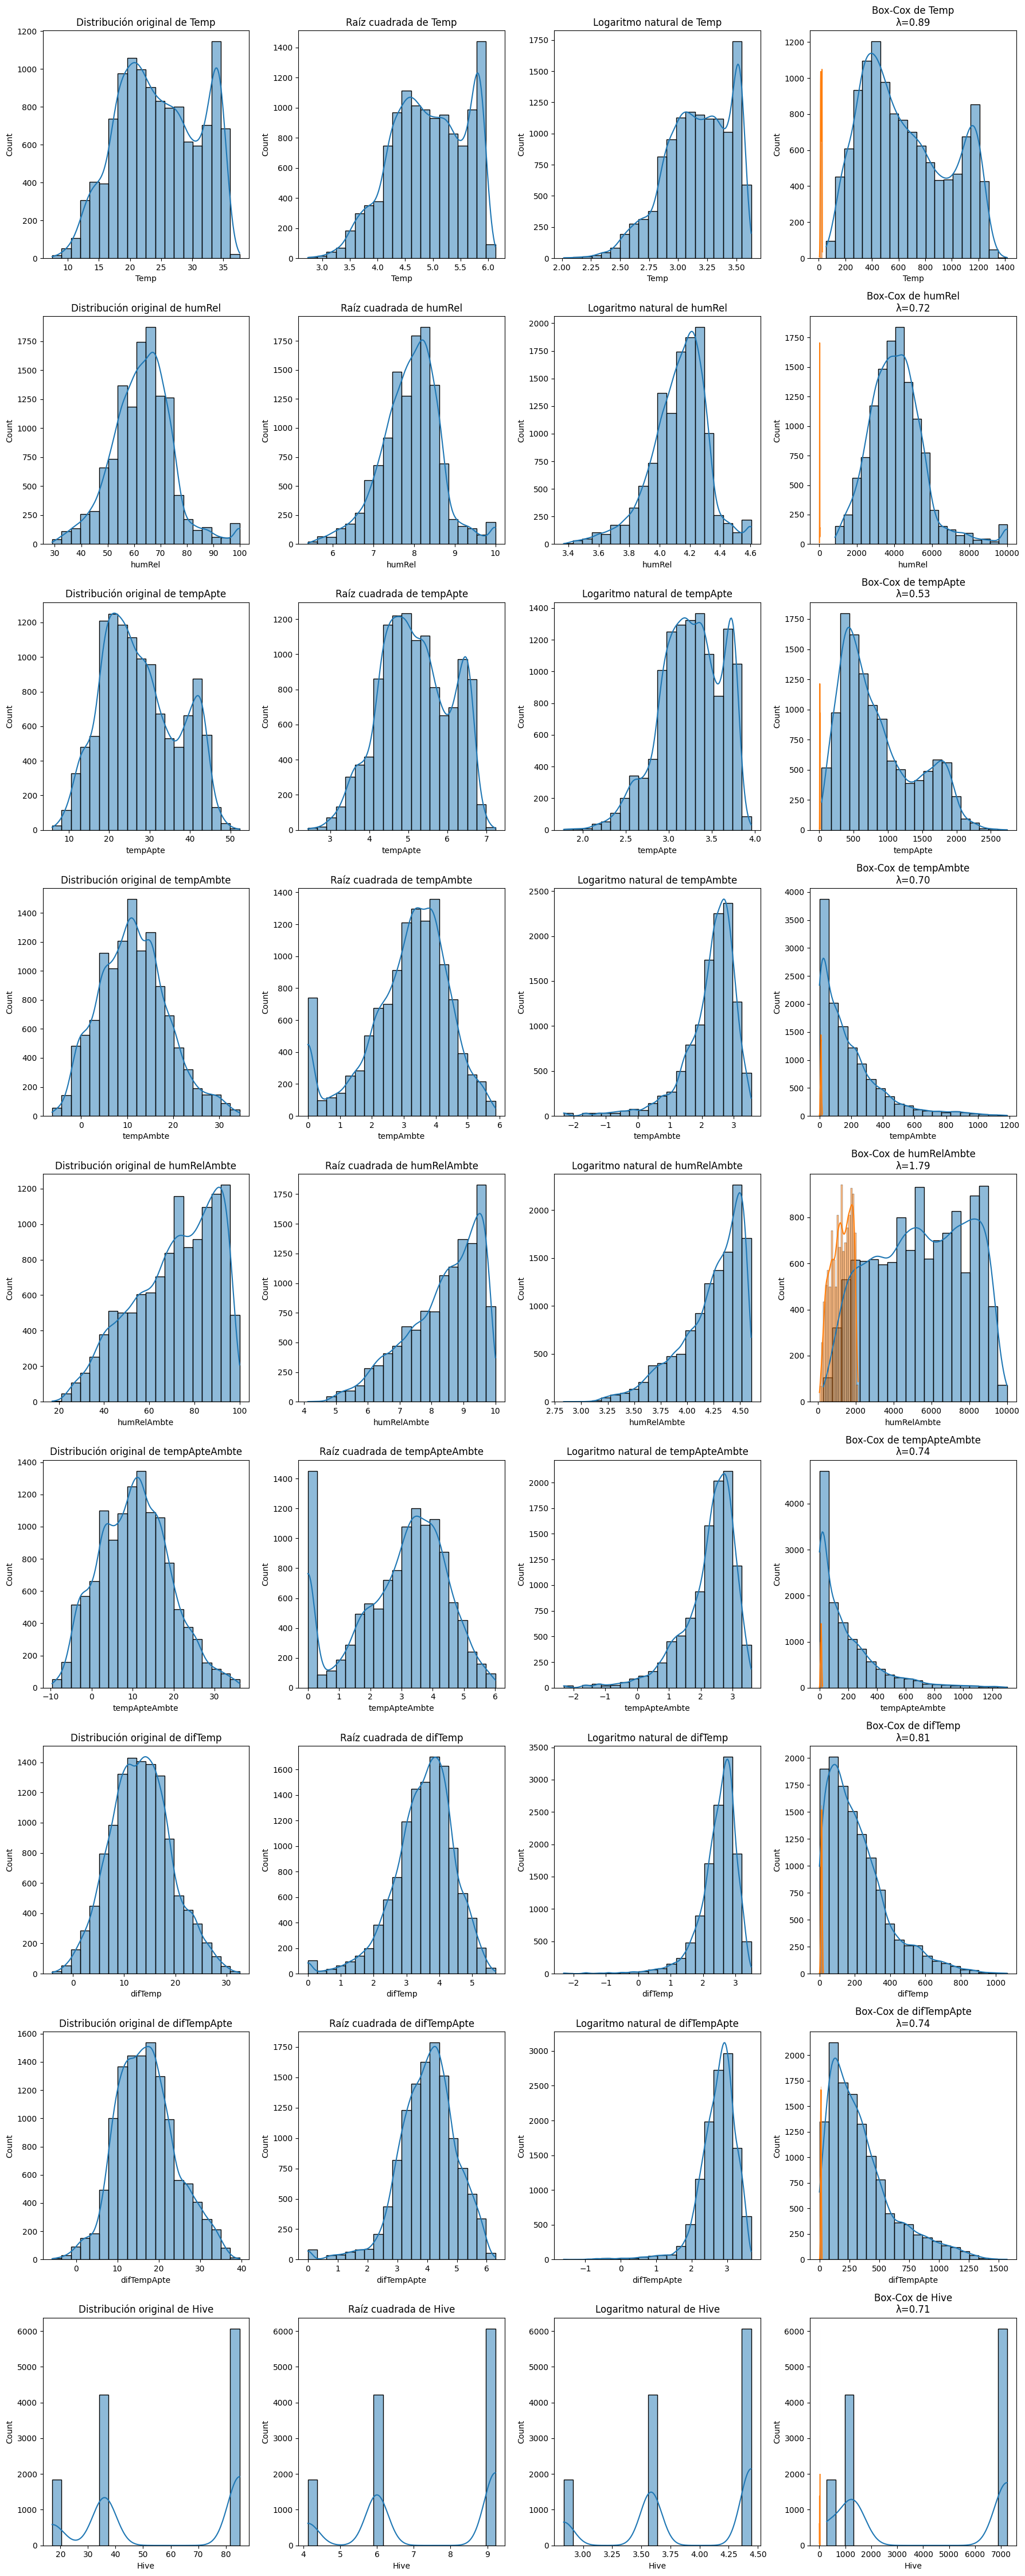

In [14]:
# Columnas numéricas de interés
columns_of_interest = ['Temp', 'humRel', 'tempApte', 'tempAmbte','humRelAmbte', 'tempApteAmbte', 'difTemp', 'difTempApte', 'Hive']

# Crear una figura con subplots para cada columna y transformación
num_cols = len(columns_of_interest)
fig, axs = plt.subplots(num_cols, 4, figsize=(18, 5 * num_cols))

for i, col in enumerate(columns_of_interest):
    # Datos originales
    sns.histplot(df_hive[col], bins=20, kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Distribución original de {col}')

    # Raíz cuadrada
    sqrt_data = np.sqrt(df_hive[col].clip(lower=0))  # Clip para evitar valores negativos
    sns.histplot(sqrt_data, bins=20, kde=True, ax=axs[i, 1])
    axs[i, 1].set_title(f'Raíz cuadrada de {col}')

    # Logaritmo natural
    log_data = np.log(df_hive[col].replace(0, np.nan).dropna())  # Manejar ceros y valores negativos
    sns.histplot(log_data, bins=20, kde=True, ax=axs[i, 2])
    axs[i, 2].set_title(f'Logaritmo natural de {col}')

    # Potencia 2
    power2_data = np.power(df_hive[col], 2)
    sns.histplot(power2_data, bins=20, kde=True, ax=axs[i, 3])
    axs[i, 3].set_title(f'Potencia 2 de {col}')

    # Box-Cox
    # Para Box-Cox, necesitamos que los datos sean estrictamente positivos
    col_data = df_hive[col]
    min_value = col_data.min()
    if min_value <= 0:
        col_data = col_data - min_value + 1  # Shift data to be positive

    col_data, fitted_lambda = stats.boxcox(col_data)
    sns.histplot(col_data, bins=20, kde=True, ax=axs[i, 3])
    axs[i, 3].set_title(f'Box-Cox de {col}\nλ={fitted_lambda:.2f}')

# Ajustar el layout
plt.tight_layout()
plt.show()

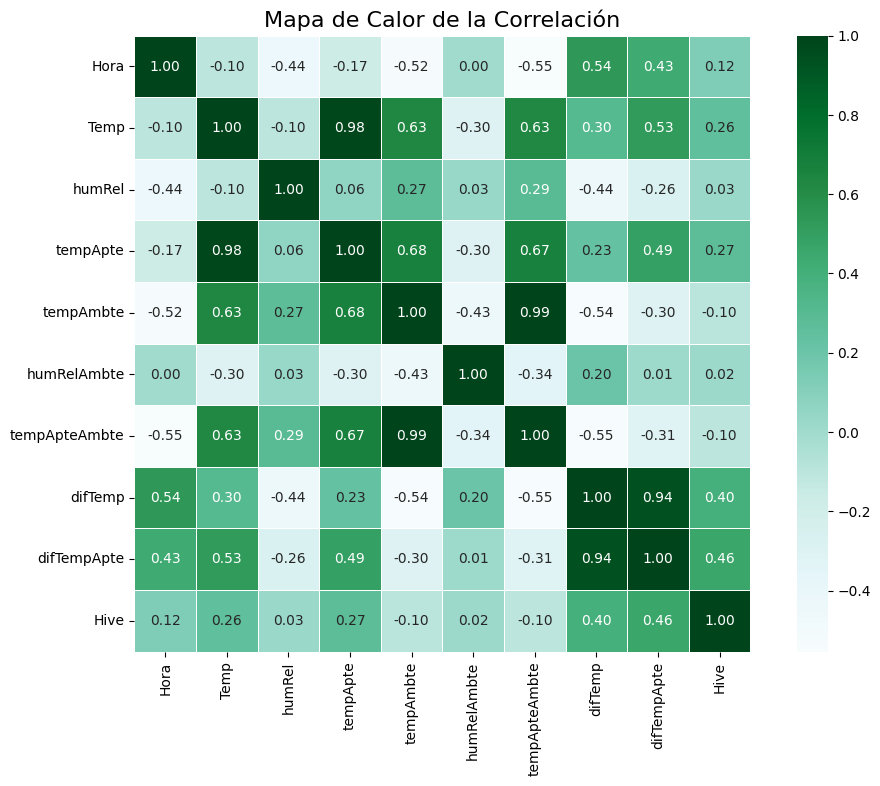

In [15]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

df_hive_numeric = df_hive.select_dtypes(include=[float, int])
df_hive_corr = df_hive_numeric.corr(method='pearson')

# Crear el mapa de calor
ax = sns.heatmap(df_hive_corr, annot=True, cmap='BuGn', fmt='.2f', linewidths=0.5, square=True)

# Ajustar el título del gráfico
plt.title('Mapa de Calor de la Correlación', fontsize=16)

# Mostrar el gráfico
plt.show()

In [16]:
# Separar variables categóricas y numéricas
categorical_vars = df_hive.select_dtypes(include=['object'])
numerical_vars = df_hive.select_dtypes(include=['float', 'int'])

print("Variables categóricas:")
print(categorical_vars.head())

print("\nVariables numéricas:")
print(numerical_vars.head())


Variables categóricas:
        Fecha   Hora
0  21.08.2021  14:00
1  21.08.2021  15:00
2  21.08.2021  16:00
3  21.08.2021  17:00
4  21.08.2021  18:00

Variables numéricas:
   Hora  Temp  humRel  tempApte  tempAmbte  humRelAmbte  tempApteAmbte  \
0     1  32.8      47      36.6       28.8           33           29.1   
1     2  33.3      46      37.1       28.8           36           29.5   
2     3  33.5      46      37.4       28.9           35           29.5   
3     4  33.8      49      38.5       28.5           36           29.1   
4     5  33.8      51      38.8       27.5           40           28.4   

   difTemp  difTempApte  Hive  
0      4.0          7.5    17  
1      4.5          7.6    17  
2      4.6          7.9    17  
3      5.3          9.3    17  
4      6.3         10.4    17  


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Escalar los datos numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_vars)

# Aplicar PCA
pca = PCA()  # Puedes especificar el número de componentes si lo deseas
pca.fit(scaled_data)

# Obtener las componentes principales
principal_components = pca.transform(scaled_data)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Mostrar las primeras filas del DataFrame de componentes principales
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,4.457093,0.345008,-2.534909,-0.536232,-0.857715,-0.998642,-0.007787,0.057153,0.000072,-7.950090e-16
1,4.436380,0.242805,-2.495530,-0.716949,-0.921248,-0.951209,-0.036603,0.031713,0.000047,-6.713564e-16
2,4.460442,0.180327,-2.519256,-0.690993,-0.895133,-0.977043,-0.029796,0.039011,0.000052,-3.615535e-16
3,4.429206,0.018853,-2.294430,-0.677924,-0.641008,-0.988606,-0.008253,0.033473,0.006898,-9.683593e-16
4,4.239591,-0.076625,-2.031383,-0.790021,-0.474600,-0.982568,-0.019956,0.008242,0.000002,-9.691345e-16


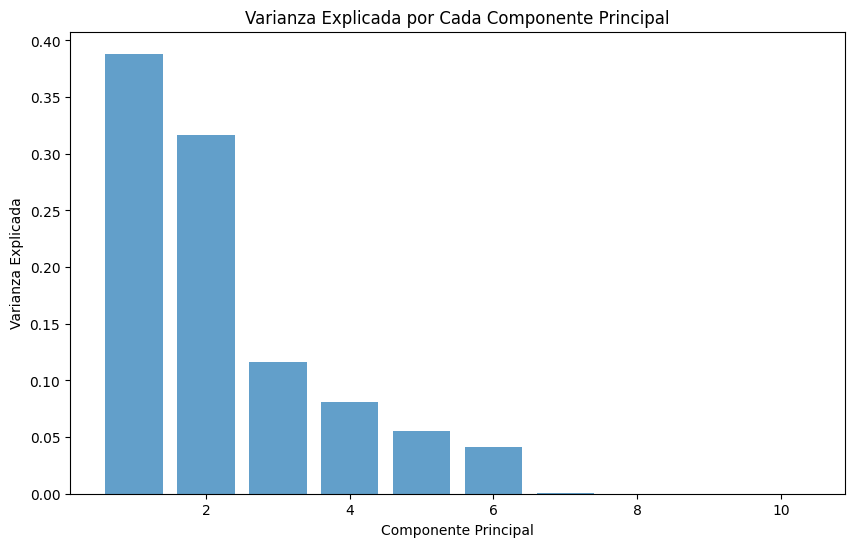

                    PC1       PC2       PC3       PC4       PC5       PC6  \
Hora          -0.333152 -0.175629 -0.353068  0.206151  0.188475  0.809516   
Temp           0.277471 -0.460331 -0.041650 -0.178392  0.018785  0.039563   
humRel         0.204535  0.177522  0.596123  0.325501  0.641938  0.149508   
tempApte       0.310289 -0.435605  0.057828 -0.112854  0.126082  0.054929   
tempAmbte      0.496679 -0.059715 -0.089624 -0.040424 -0.090954  0.191887   
humRelAmbte   -0.215113  0.102323  0.522133 -0.699895 -0.158941  0.378309   
tempApteAmbte  0.495663 -0.050141 -0.033651 -0.111899 -0.102444  0.221965   
difTemp       -0.311207 -0.426207  0.065298 -0.143856  0.132561 -0.193673   
difTempApte   -0.184162 -0.500162  0.113784 -0.013280  0.282139 -0.190258   
Hive          -0.067045 -0.296006  0.464654  0.531142 -0.628441  0.121799   

                    PC7       PC8       PC9          PC10  
Hora          -0.005254 -0.011938  0.000009  3.979407e-17  
Temp          -0.471454  0.36698

In [18]:
# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Crear un gráfico de barras de la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.show()

# Obtener los loadings (coeficientes) de cada variable en cada componente
loadings = pca.components_

# Crear un DataFrame de loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=numerical_vars.columns)

# Mostrar los loadings
print(loadings_df)

# Para cada componente, mostrar las variables más importantes
for i in range(loadings.shape[0]):
    print(f"\nVariables más importantes para PC{i+1}:")
    print(loadings_df.iloc[:, i].abs().sort_values(ascending=False)[:5])  # Mostrar las 5 variables con mayores loadings absolutos


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

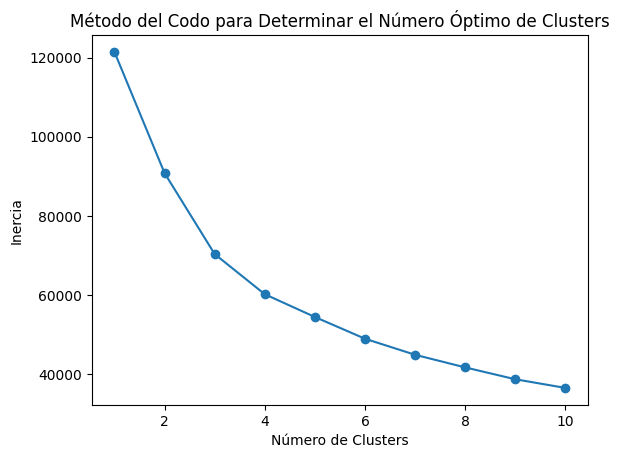

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


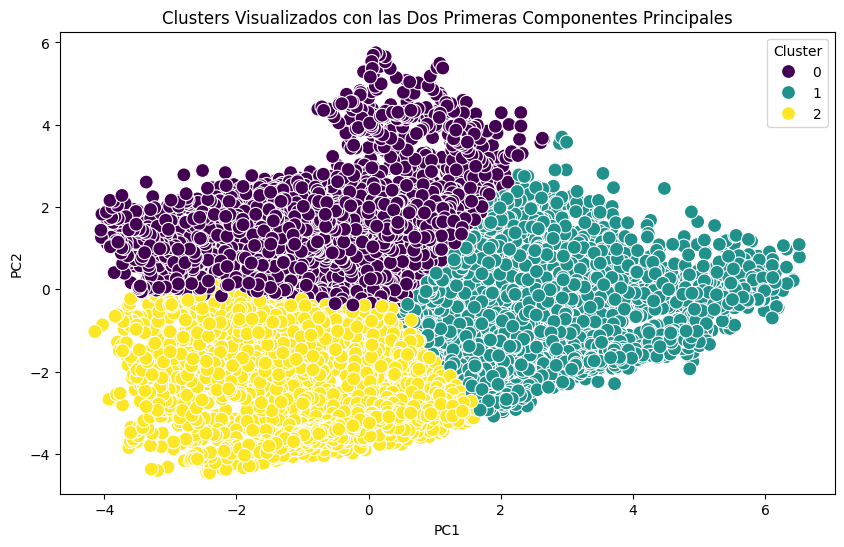


Cluster 0:
               PC1          PC2          PC3          PC4          PC5  \
count  5647.000000  5647.000000  5647.000000  5647.000000  5647.000000   
mean     -0.757811     1.381264     0.157042     0.100804     0.026615   
std       1.323771     0.990367     0.845117     0.888712     0.717538   
min      -4.050746    -0.534088    -3.345655    -2.195258    -1.595993   
25%      -1.690640     0.698490    -0.345050    -0.611297    -0.563256   
50%      -0.666745     1.297843     0.229165     0.111568     0.008146   
75%       0.251446     1.871301     0.759587     0.693791     0.485305   
max       2.649563     5.750994     2.982659     3.002127     2.138589   

               PC6          PC7          PC8          PC9          PC10  \
count  5647.000000  5647.000000  5647.000000  5647.000000  5.647000e+03   
mean      0.061557     0.004203     0.002722     0.000009  1.772015e-16   
std       0.593881     0.072156     0.030587     0.003419  2.940181e-16   
min      -1.543025   

In [27]:
# prompt: crea un clúster bajo el resultado PCA

from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in true_divide")

# Determinar el número óptimo de clusters usando el método del codo
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Basado en el gráfico del codo, elegir el número óptimo de clusters
# Por ejemplo, si el codo se forma en k=3, entonces:
optimal_k = 3

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Agregar la información de clusters al DataFrame original
pca_df['Cluster'] = clusters

# Visualizar los clusters (ejemplo usando las dos primeras componentes principales)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters Visualizados con las Dos Primeras Componentes Principales')
plt.show()

# Analizar las características de cada cluster
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    cluster_data = pca_df[pca_df['Cluster'] == i]
    print(cluster_data.describe())


In [19]:
threshold = 0.95
cumulative_variance = np.cumsum(explained_variance)
num_components_to_keep = np.argmax(cumulative_variance >= threshold) + 1

print(f"Número de componentes principales a mantener (umbral {threshold*100}%): {num_components_to_keep}")

# 2. Selección basada en loadings:
#   - Para cada componente, selecciona las variables con los loadings más altos (en valor absoluto)

top_features_per_component = 3  # Número de características a seleccionar por componente
selected_features = []

for i in range(num_components_to_keep):
    top_features_indices = np.argsort(np.abs(loadings[i]))[::-1][:top_features_per_component]
    selected_features.extend(numerical_vars.columns[top_features_indices])

selected_features = list(set(selected_features))  # Eliminar duplicados

print("\nCaracterísticas seleccionadas basadas en loadings:")
print(selected_features)

X_selected = numerical_vars[selected_features]


Número de componentes principales a mantener (umbral 95.0%): 5

Características seleccionadas basadas en loadings:
['humRelAmbte', 'Hora', 'tempApte', 'tempAmbte', 'humRel', 'Hive', 'difTempApte', 'tempApteAmbte', 'Temp']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, df_hive['Temp'], test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 5.153486493626401e-26
Coeficiente de determinación (R^2): 1.0


In [21]:
# Definir los umbrales para las clases discretas
# Ajusta estos valores según tus necesidades
umbral_bajo = 30
umbral_alto = 35

# Crear clases discretas para las predicciones
y_pred_clases = np.where(y_pred < umbral_bajo, 'Baja',
                         np.where(y_pred > umbral_alto, 'Alta', 'Media'))

# Crear clases discretas para los valores reales
y_test_clases = np.where(y_test < umbral_bajo, 'Baja',
                         np.where(y_test > umbral_alto, 'Alta', 'Media'))

# Imprimir las primeras 10 predicciones y valores reales con sus clases
for i in range(10):
    print(f"Predicción: {y_pred[i]:.2f} (Clase: {y_pred_clases[i]}), Real: {y_test.iloc[i]:.2f} (Clase: {y_test_clases[i]})")


Predicción: 21.50 (Clase: Baja), Real: 21.50 (Clase: Baja)
Predicción: 33.90 (Clase: Media), Real: 33.90 (Clase: Media)
Predicción: 8.10 (Clase: Baja), Real: 8.10 (Clase: Baja)
Predicción: 14.60 (Clase: Baja), Real: 14.60 (Clase: Baja)
Predicción: 18.60 (Clase: Baja), Real: 18.60 (Clase: Baja)
Predicción: 19.80 (Clase: Baja), Real: 19.80 (Clase: Baja)
Predicción: 33.00 (Clase: Media), Real: 33.00 (Clase: Media)
Predicción: 23.10 (Clase: Baja), Real: 23.10 (Clase: Baja)
Predicción: 21.80 (Clase: Baja), Real: 21.80 (Clase: Baja)
Predicción: 25.80 (Clase: Baja), Real: 25.80 (Clase: Baja)


[[  66    0    0]
 [   0 1784    0]
 [  12    7  561]]


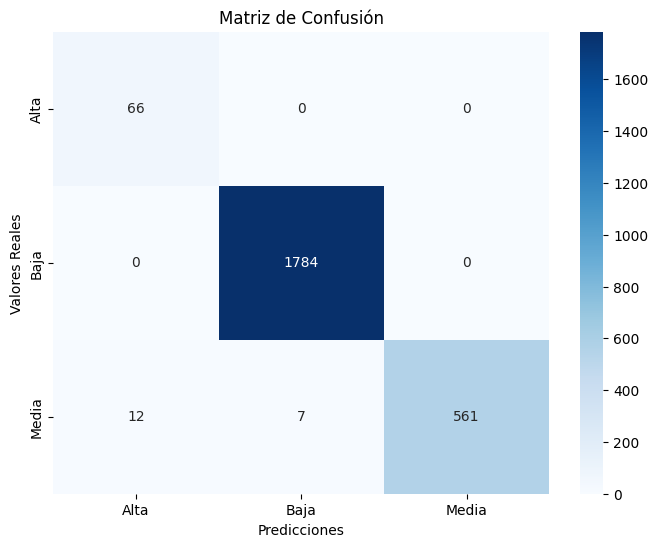

In [22]:
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(y_test_clases, y_pred_clases)

# Imprimir la matriz de confusión
print(cm)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Alta', 'Baja', 'Media'], yticklabels=['Alta', 'Baja', 'Media'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


In [23]:
from sklearn.metrics import classification_report

# Asegúrate de que y_test_clases y y_pred_clases sean arrays de NumPy
y_test_clases = np.array(y_test_clases)
y_pred_clases = np.array(y_pred_clases)

# Generar el reporte de clasificación
print(classification_report(y_test_clases, y_pred_clases))


              precision    recall  f1-score   support

        Alta       0.85      1.00      0.92        66
        Baja       1.00      1.00      1.00      1784
       Media       1.00      0.97      0.98       580

    accuracy                           0.99      2430
   macro avg       0.95      0.99      0.97      2430
weighted avg       0.99      0.99      0.99      2430

